# TELUS ASSESSMENT: Predicting Avg Dwell time in Telco

# Problem statement (Task 1)

## Part 1: Getting and Cleaning the data

In [1]:
import pandas as pd              # package for data wrangling and transformation
import numpy as np               # package for linear algebra
import seaborn as sns            # advanced graphical interface package 
import matplotlib.pyplot as plt  # basic graphical interface package
import copy

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 1. Getting the data

In [3]:
# geo location data 
geo = pd.read_csv('/root/anaconda3/analytics/Projects/telco_dwell_time/geolocation_data.csv')

# Poseidon CTC Mall Geofence data
poseidon = pd.read_csv('/root/anaconda3/analytics/Projects/telco_dwell_time/Poseidon CTC Mall Geofence Cell List.csv')

# cgi data

cgi = pd.read_csv('/root/anaconda3/analytics/Projects/telco_dwell_time/cgi.csv')

#### Checking shape and data structure

**1. geolocation data**

In [4]:
print(geo.columns)

Index(['imsi_id', 'event_ts', 'cgi_id'], dtype='object')


In [5]:
print(geo.shape)

(408917, 3)


In [6]:
geo.head()

,imsi_id,event_ts,cgi_id
0,778fb33d64b6dcbc67c79ca6d35f7820f993f26c74502c...,01/09/2020 1:09,4G:302-220-113919-131
1,753c0c75ac582307c3b0d04bbe4cfe7d118684d1b4060e...,01/09/2020 1:09,4G:302-220-113155-41
2,05f8982252e683f1fed1f3ebd42f60848587a4e270ddcc...,01/09/2020 1:09,4G:302-220-113937-10
3,d5ce6f7f332850a23ae4700231c87dec634a1e7832304d...,01/09/2020 1:09,302-220-11201-23458
4,05f8982252e683f1fed1f3ebd42f60848587a4e270ddcc...,01/09/2020 1:09,4G:302-220-113937-10


In [7]:
geo.dtypes

imsi_id     object
event_ts    object
cgi_id      object
dtype: object

In [8]:
geo.cgi_id.nunique()

14670

In [9]:
geo.imsi_id.nunique()

1752

**2. Poisedon CTC Mall**

In [10]:
poseidon.columns

Index(['Poseidon CTC Mall Geofence Cell List'], dtype='object')

In [11]:
poseidon.shape

(105, 1)

In [12]:
poseidon.head()

,Poseidon CTC Mall Geofence Cell List
0,4G:302-220-113122-132
1,4G:302-220-113122-42
2,4G:302-220-113122-112
3,4G:302-220-113122-2
4,4G:302-220-113122-131


In [13]:
poseidon.dtypes

Poseidon CTC Mall Geofence Cell List    object
dtype: object

In [14]:
poseidon['Poseidon CTC Mall Geofence Cell List'].nunique()

75

We have 75 unique cells (that fence the **POI of "Poseidon CTC Mall"**) to which we are interested in. So we drop the duplicate values and have it ready to be merged:

In [15]:
poseidon.drop_duplicates(subset=['Poseidon CTC Mall Geofence Cell List'], inplace = True)

In [16]:
poseidon.head()

,Poseidon CTC Mall Geofence Cell List
0,4G:302-220-113122-132
1,4G:302-220-113122-42
2,4G:302-220-113122-112
3,4G:302-220-113122-2
4,4G:302-220-113122-131


In [17]:
poseidon.shape # indeed we have 75 cells

(75, 1)

**3.CGI (Cell Global Identity) External Data**

In [18]:
cgi.columns

Index(['MCC', 'MNC', 'ISO', 'Country', 'Brand', 'Operator'], dtype='object')

In [19]:
cgi.shape

(3, 6)

In [20]:
cgi.head()

,MCC,MNC,ISO,Country,Brand,Operator
0,302,220,CA,Canada,"Telus Mobility, Koodo Mobile, Public Mobile",Telus Mobility
1,302,610,CA,Canada,Bell Mobility,Bell Mobility
2,302,880,CA,Canada,Bell / Telus / SaskTel,"Shared Telus, Bell, and SaskTel"


In [21]:
cgi.dtypes

MCC          int64
MNC          int64
ISO         object
Country     object
Brand       object
Operator    object
dtype: object

In [22]:
cgi.MCC = cgi.MCC.astype('object')
cgi.MNC = cgi.MNC.astype('object')
cgi.dtypes

MCC         object
MNC         object
ISO         object
Country     object
Brand       object
Operator    object
dtype: object

### 2. Merging the data

In [23]:
df = pd.merge(poseidon, geo, left_on = 'Poseidon CTC Mall Geofence Cell List', right_on = 'cgi_id')


In [24]:
df.head()

,Poseidon CTC Mall Geofence Cell List,imsi_id,event_ts,cgi_id
0,4G:302-220-113122-132,b58217bd1fe520ae4cb6a2228ea1cffa68590965cc5ba8...,01/09/2020 18:21,4G:302-220-113122-132
1,4G:302-220-113122-132,2f65da3d1f0ed00d831a2037868732a262523d6231e9bf...,01/09/2020 13:59,4G:302-220-113122-132
2,4G:302-220-113122-132,450c1b07f639674e3e004251fb86ce273ac21bc1c1754e...,01/09/2020 23:28,4G:302-220-113122-132
3,4G:302-220-113122-132,2f627a032a70455a80760c51c0c8cc9282c87f52a25703...,01/09/2020 21:13,4G:302-220-113122-132
4,4G:302-220-113122-42,044aa99b8a013c64e3924cf76dec7c9a25d7315bcaccaf...,01/09/2020 3:29,4G:302-220-113122-42


In [25]:
df.shape

(432, 4)

**checking unique values for cgi_id**

Unique cells corresponding to Poseidon CTC Mall:

In [26]:
df.cgi_id.nunique()

21

Unique client Ids (clients to be analized)

In [27]:
df.imsi_id.nunique()

33

**Extract Information from CGI: MCC - MNC - LAC - CI**

In [28]:
#just copy
df2 = copy.deepcopy(df)

In [29]:
new = df["cgi_id"].str.split("-", n = 4, expand = True)

In [30]:
new.head()

,0,1,2,3
0,4G:302,220,113122,132
1,4G:302,220,113122,132
2,4G:302,220,113122,132
3,4G:302,220,113122,132
4,4G:302,220,113122,42


In [31]:
broad_MCC = pd.DataFrame(new[0])

If broadband does not contain 4G then place "other"

In [32]:
broad_MCC[1] = broad_MCC[0].map(lambda x: "4G" if "4G" in x else 'Other')

**Beacuse MCC is always a 3 digit character, then we extraf last 3 characters:**

In [33]:
broad_MCC[2] = broad_MCC[0].str[-3:]

In [34]:
broad_MCC[2].nunique() #indeed we have only 1 value.

1

In [35]:
broad_MCC.head()

,0,1,2
0,4G:302,4G,302
1,4G:302,4G,302
2,4G:302,4G,302
3,4G:302,4G,302
4,4G:302,4G,302


### Feature Engineering (part 1)

In [36]:
df['broadband'] = broad_MCC[1]

In [37]:
df['MCC'] = broad_MCC[2]

In [38]:
df['MNC'] =  new[1]

In [39]:
df['LAC'] =  new[2]

In [40]:
df['CI'] =  new[3]

In [41]:
df.head()

,Poseidon CTC Mall Geofence Cell List,imsi_id,event_ts,cgi_id,broadband,MCC,MNC,LAC,CI
0,4G:302-220-113122-132,b58217bd1fe520ae4cb6a2228ea1cffa68590965cc5ba8...,01/09/2020 18:21,4G:302-220-113122-132,4G,302,220,113122,132
1,4G:302-220-113122-132,2f65da3d1f0ed00d831a2037868732a262523d6231e9bf...,01/09/2020 13:59,4G:302-220-113122-132,4G,302,220,113122,132
2,4G:302-220-113122-132,450c1b07f639674e3e004251fb86ce273ac21bc1c1754e...,01/09/2020 23:28,4G:302-220-113122-132,4G,302,220,113122,132
3,4G:302-220-113122-132,2f627a032a70455a80760c51c0c8cc9282c87f52a25703...,01/09/2020 21:13,4G:302-220-113122-132,4G,302,220,113122,132
4,4G:302-220-113122-42,044aa99b8a013c64e3924cf76dec7c9a25d7315bcaccaf...,01/09/2020 3:29,4G:302-220-113122-42,4G,302,220,113122,42


**Dropping unnessary columns**

In [42]:
df.drop(columns=['Poseidon CTC Mall Geofence Cell List', 'cgi_id'], inplace = True)

In [43]:
df.head()

,imsi_id,event_ts,broadband,MCC,MNC,LAC,CI
0,b58217bd1fe520ae4cb6a2228ea1cffa68590965cc5ba8...,01/09/2020 18:21,4G,302,220,113122,132
1,2f65da3d1f0ed00d831a2037868732a262523d6231e9bf...,01/09/2020 13:59,4G,302,220,113122,132
2,450c1b07f639674e3e004251fb86ce273ac21bc1c1754e...,01/09/2020 23:28,4G,302,220,113122,132
3,2f627a032a70455a80760c51c0c8cc9282c87f52a25703...,01/09/2020 21:13,4G,302,220,113122,132
4,044aa99b8a013c64e3924cf76dec7c9a25d7315bcaccaf...,01/09/2020 3:29,4G,302,220,113122,42


In [44]:
df2 = copy.deepcopy(df)

**converting data types to able to merge data**

In [45]:
df.MCC = df.MCC.astype('str')
df.MNC = df.MNC.astype('str')
cgi.MCC = cgi.MCC.astype('str')
cgi.MNC = cgi.MNC.astype('str')


In [46]:
telco = pd.merge(df, cgi, how = 'left', left_on = ['MCC', 'MNC'], right_on = ['MCC', 'MNC' ])

In [47]:
telco.head()

,imsi_id,event_ts,broadband,MCC,MNC,LAC,CI,ISO,Country,Brand,Operator
0,b58217bd1fe520ae4cb6a2228ea1cffa68590965cc5ba8...,01/09/2020 18:21,4G,302,220,113122,132,CA,Canada,"Telus Mobility, Koodo Mobile, Public Mobile",Telus Mobility
1,2f65da3d1f0ed00d831a2037868732a262523d6231e9bf...,01/09/2020 13:59,4G,302,220,113122,132,CA,Canada,"Telus Mobility, Koodo Mobile, Public Mobile",Telus Mobility
2,450c1b07f639674e3e004251fb86ce273ac21bc1c1754e...,01/09/2020 23:28,4G,302,220,113122,132,CA,Canada,"Telus Mobility, Koodo Mobile, Public Mobile",Telus Mobility
3,2f627a032a70455a80760c51c0c8cc9282c87f52a25703...,01/09/2020 21:13,4G,302,220,113122,132,CA,Canada,"Telus Mobility, Koodo Mobile, Public Mobile",Telus Mobility
4,044aa99b8a013c64e3924cf76dec7c9a25d7315bcaccaf...,01/09/2020 3:29,4G,302,220,113122,42,CA,Canada,"Telus Mobility, Koodo Mobile, Public Mobile",Telus Mobility


In [48]:
#telco.groupby('MNC').size()

In [49]:
telco.shape

(432, 11)

As we can see, we have merged the data correctly. Some columns showed previously, was to show the type of information that we have in our hands. For instance, Country and Brand: They show the country that we are analyzing, and brand has similarity with the operator. ISO also contains "CA".

From this point on, we are going to these 2 columns.

In [50]:
telco.drop(columns=['ISO', 'Country', 'Brand'], inplace = True)

In [51]:
telco.head()

,imsi_id,event_ts,broadband,MCC,MNC,LAC,CI,Operator
0,b58217bd1fe520ae4cb6a2228ea1cffa68590965cc5ba8...,01/09/2020 18:21,4G,302,220,113122,132,Telus Mobility
1,2f65da3d1f0ed00d831a2037868732a262523d6231e9bf...,01/09/2020 13:59,4G,302,220,113122,132,Telus Mobility
2,450c1b07f639674e3e004251fb86ce273ac21bc1c1754e...,01/09/2020 23:28,4G,302,220,113122,132,Telus Mobility
3,2f627a032a70455a80760c51c0c8cc9282c87f52a25703...,01/09/2020 21:13,4G,302,220,113122,132,Telus Mobility
4,044aa99b8a013c64e3924cf76dec7c9a25d7315bcaccaf...,01/09/2020 3:29,4G,302,220,113122,42,Telus Mobility


## 4. Data cleaning

**Checking Null values**

In [52]:
telco_nulls = telco.isna().sum()[telco.isna().sum()!= 0].reset_index().rename(columns=
                                                                        {'index': 'col_name', 0: '#'})
telco_nulls['%'] = telco_nulls['#'] / telco.shape[0]
telco_nulls

,col_name,#,%


In [53]:
telco.head(5)

,imsi_id,event_ts,broadband,MCC,MNC,LAC,CI,Operator
0,b58217bd1fe520ae4cb6a2228ea1cffa68590965cc5ba8...,01/09/2020 18:21,4G,302,220,113122,132,Telus Mobility
1,2f65da3d1f0ed00d831a2037868732a262523d6231e9bf...,01/09/2020 13:59,4G,302,220,113122,132,Telus Mobility
2,450c1b07f639674e3e004251fb86ce273ac21bc1c1754e...,01/09/2020 23:28,4G,302,220,113122,132,Telus Mobility
3,2f627a032a70455a80760c51c0c8cc9282c87f52a25703...,01/09/2020 21:13,4G,302,220,113122,132,Telus Mobility
4,044aa99b8a013c64e3924cf76dec7c9a25d7315bcaccaf...,01/09/2020 3:29,4G,302,220,113122,42,Telus Mobility


No null values were found in the data.

## 5. Exploratory Data Analysis (part 1)

The first phase of our data exploration consists in analyzing our categorical variables. In the second phase, we will be focusing on the time-based analysis.

**Client Analysis**

In [54]:
telco.imsi_id.nunique()

33

In [55]:
telco.shape[0]

432

**Insight 1:** On September 1st 2020, we had a total of 432 visits covered by our current POI (located at Poseidon CTC Mall, Canada). In total, the POI served 33 unique clients. 

**Broadband Analysis**

<AxesSubplot:xlabel='broadband', ylabel='count'>

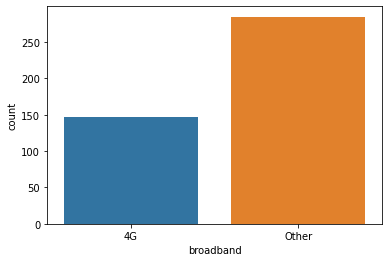

In [56]:
sns.countplot(telco.broadband)

In [57]:
round(100 * telco.groupby(['broadband']).size() / telco.shape[0])

broadband
4G       34.0
Other    66.0
dtype: float64

**Insight 2:** Our POI demanded 34% of 4G broadband and 66% of the rest. This 66% was catalogued as “other” since there was no specification on the dataset about the broadband covered on this particular points.

**MCC / MNC / LAC / CI Analysis**

In [58]:
telco.groupby(['MCC']).size()

MCC
302    432
dtype: int64

In [59]:
telco.groupby(['MNC']).size()

MNC
220    431
880      1
dtype: int64

<AxesSubplot:xlabel='LAC', ylabel='count'>

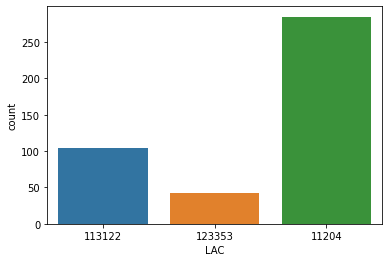

In [60]:
sns.countplot(telco.LAC)

In [61]:
LAC = pd.DataFrame()
LAC['n'] = telco.groupby(['LAC']).size()
LAC['%'] = round(100 * (LAC['n'] / telco.shape[0]))
LAC

,n,%
LAC,,
11204,285,66.0
113122,104,24.0
123353,43,10.0


In [62]:
CI = pd.DataFrame()
CI['n'] = telco.groupby(['CI']).size().sort_values(ascending = False)
CI['%'] = round(100 * (CI['n'] / telco.shape[0]))
CI

,n,%
CI,,
24122,111,26.0
24353,79,18.0
21122,50,12.0
41,48,11.0
25122,43,10.0
111,37,9.0
131,23,5.0
1,18,4.0
42,5,1.0


**Insight 3:** On September 1st 2020, our POI registered two types of MNC (Mobile Network Code): 220 (441 times) and 880 (1 time). We were able to find the information regarding this codes, and extract the operator names **source: https://mcc-mnc-list.com/list**: "Telus Mobility" (220) and "Shared Telus, Bell, and SaskTel (880)"

**Insight 4:** In addition to the previous insight, our group of cell towers is divided in 3 categories: 11204, 113122 and 123353. There was a high demand on the LAC 11204 (285 times) of about 66%; this is the most critical group so far. Our POI registered a total of 16 cells serving our Poseidon CTC Mall and most demanded CIs (Cells Ids) were: 24122 (26%), 24353 (18%) and 21122 (12%). The rest is serving around 44% of the time.

### Exploratory Data Analysis (part 2)

**Formatting time-based data** (**convert date time to minutes**)

In [63]:
telcov2 = copy.deepcopy(telco)
#telco = telcov2

In [64]:
telco = telcov2

In [65]:
telco.event_ts = df.event_ts.astype('datetime64[ns]')

In [66]:
telco = telco.sort_values(by = ['event_ts'], ascending = True)

In [67]:
time = pd.DatetimeIndex(telco.event_ts)  # converts to datetime object index
telco['hours'] = (time.hour  + time.minute / 60 + time.second / 3600 )
telco

,imsi_id,event_ts,broadband,MCC,MNC,LAC,CI,Operator,hours
61,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,2020-01-09 00:00:00,4G,302,220,113122,41,Telus Mobility,0.000000
52,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,2020-01-09 00:00:00,4G,302,220,113122,41,Telus Mobility,0.000000
70,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,2020-01-09 00:00:00,4G,302,220,113122,41,Telus Mobility,0.000000
149,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,2020-01-09 00:33:00,Other,302,220,11204,25122,Telus Mobility,0.550000
148,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,2020-01-09 00:33:00,Other,302,220,11204,25122,Telus Mobility,0.550000
...,...,...,...,...,...,...,...,...,...
15,059e71d6579dadcfa0cef78ee779b671ac254549a2b4bb...,2020-01-09 23:51:00,4G,302,220,113122,2,Telus Mobility,23.850000
69,059e71d6579dadcfa0cef78ee779b671ac254549a2b4bb...,2020-01-09 23:53:00,4G,302,220,113122,41,Telus Mobility,23.883333
287,c6f43f7ae49f220a883f6b63b26024eff38ce3c2e773a6...,2020-01-09 23:54:00,Other,302,220,11204,24122,Telus Mobility,23.900000
45,059e71d6579dadcfa0cef78ee779b671ac254549a2b4bb...,2020-01-09 23:54:00,4G,302,220,113122,41,Telus Mobility,23.900000


In [68]:
telco.head(10)

,imsi_id,event_ts,broadband,MCC,MNC,LAC,CI,Operator,hours
61,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,2020-01-09 00:00:00,4G,302,220,113122,41,Telus Mobility,0.000000
52,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,2020-01-09 00:00:00,4G,302,220,113122,41,Telus Mobility,0.000000
70,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,2020-01-09 00:00:00,4G,302,220,113122,41,Telus Mobility,0.000000
149,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,2020-01-09 00:33:00,Other,302,220,11204,25122,Telus Mobility,0.550000
148,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,2020-01-09 00:33:00,Other,302,220,11204,25122,Telus Mobility,0.550000
165,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,2020-01-09 00:34:00,Other,302,220,11204,25122,Telus Mobility,0.566667
166,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,2020-01-09 00:34:00,Other,302,220,11204,25122,Telus Mobility,0.566667
171,e41a1559c092dfa12acf39072821ce575665fdc4c2a46c...,2020-01-09 00:37:00,Other,302,220,11204,25122,Telus Mobility,0.616667
186,d6a5b12c28dc324c1ff61b2540336c0fbe3ac89b1744be...,2020-01-09 00:48:00,Other,302,220,11204,25122,Telus Mobility,0.800000
155,d6a5b12c28dc324c1ff61b2540336c0fbe3ac89b1744be...,2020-01-09 00:48:00,Other,302,220,11204,25122,Telus Mobility,0.800000


In [90]:
output = telco.groupby('imsi_id').agg(
    dwell_time = ('hours', 'mean' ),
    r_visits = ('imsi_id', 'count')
     ).sort_values(by = ['dwell_time'], ascending = True).reset_index()



Next, we present the list of our 33 clients according to their dwell_time and the number of recurrent visits by each one of them:

In [89]:
pd.set_option('display.max_rows', 50)
output

,imsi_id,dwell_time,r_visits
0,9dd48ceccaea12ad1ed02afa45f096bba2409f1f5e04d5...,0.558333,4
1,d6a5b12c28dc324c1ff61b2540336c0fbe3ac89b1744be...,0.800000,2
2,9366f7e222a3682413fc4b3480289bf5ee8bee9f5c9354...,1.316667,1
3,f48b2e8df1f9f912c788b57e6f2c3246e08b74440f033e...,1.966667,6
4,f70cd60e8a80eebd2422c0db3d8fb5d9b441bb6ef22c71...,10.123333,5
5,e41a1559c092dfa12acf39072821ce575665fdc4c2a46c...,10.822917,16
6,10ef0c74bc117442d7af58334e1a7f6d7e6e374a705e1f...,11.524242,11
7,9f6dbb4957e34ad65b4061e1ac326afa539752db6a1f57...,12.148148,9
8,c6f43f7ae49f220a883f6b63b26024eff38ce3c2e773a6...,13.783965,132
9,e2ee0f057e15ceedbb10b6c7ba335487fd20cfb7b1ca55...,13.992857,7


**Insight 5:** Our greatest potential client registered on September 1st, 2020 was:

In [72]:
output[output.r_visits == output.r_visits.max()]

,imsi_id,dwell_time,r_visits
8,c6f43f7ae49f220a883f6b63b26024eff38ce3c2e773a6...,13.783965,132


In addition, we can target this client in business hours from 1 PM - 2 PM. 

**Insight 6** Our most concurrent currents registered in our Poseidon CTC Mall POI were:

In [73]:
output.nlargest(3, 'r_visits')

,imsi_id,dwell_time,r_visits
8,c6f43f7ae49f220a883f6b63b26024eff38ce3c2e773a6...,13.783965,132
17,7948cc9c2c4ede47301ef73252a41fdf9b8e07817f5604...,17.503604,37
29,bc9e5df525777dbe77e262794de72923365aa37b3c019f...,21.129902,34


**Displaying the distribution of dwell time by the number of recurrent visits:**

In [74]:
output_bin = copy.deepcopy(output)

output_bin['points_bin'] = pd.qcut(output_bin['dwell_time'], q=8)

output_bin = output_bin.groupby('points_bin').agg(
    n_visits = ('r_visits', 'sum')
     ).reset_index()

Text(0.5, 1.0, 'Distribution of dwell time (Poseidon CTC Mall)')

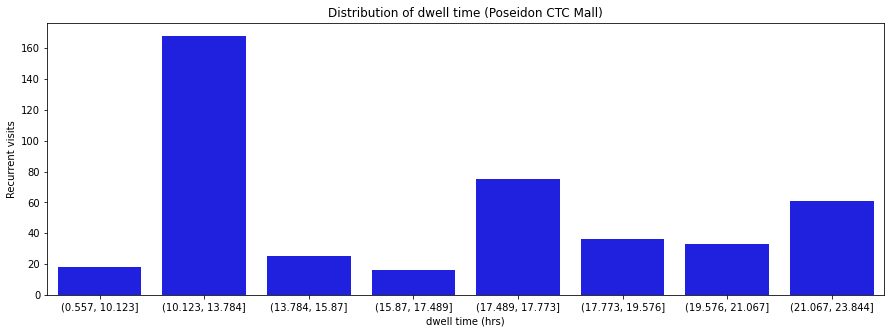

In [75]:
plt.figure(figsize = (15, 5))
sns.barplot(x = output_bin.points_bin, y = output_bin.n_visits, color = 'blue')
# Labeling of the plot
plt.xlabel('dwell time (hrs)') 
plt.ylabel('Recurrent visits')
plt.title('Distribution of dwell time (Poseidon CTC Mall)')

**Insight 7 (a):** Busiest hours at Poseidon CTC Mall on Sept 1st 2020 occurred between 10 hrs and 13 hrs, with a number of recurrent visits > 160. Particularly, this is the segment that our marketing work force should focus on.   

**Displaying the relationship between dwell time and the number of recurrent visits**

Text(0.5, 1.0, 'Dwell_time vs Recurrent visits (Poseidon CTC Mall)')

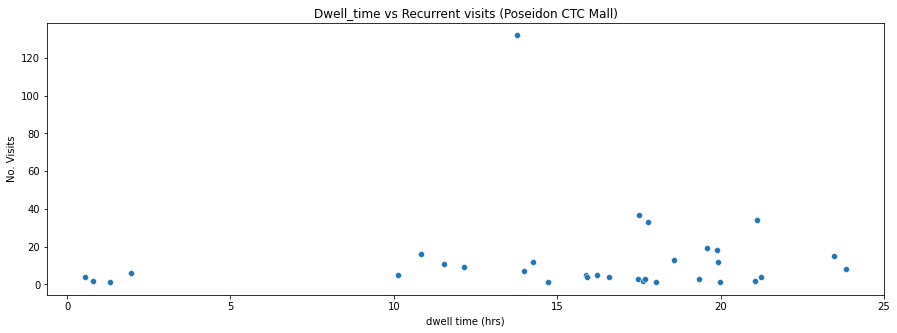

In [77]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = output.dwell_time, y = output.r_visits)
# Labeling of the plot
plt.xlabel('dwell time (hrs)') 
plt.ylabel('No. Visits')
plt.title('Dwell_time vs Recurrent visits (Poseidon CTC Mall)')

In [79]:
output[output.r_visits == output.r_visits.max()]

,imsi_id,dwell_time,r_visits
8,c6f43f7ae49f220a883f6b63b26024eff38ce3c2e773a6...,13.783965,132


**Insight 7 (b):** We can see a potential outlier which corresponds to the previous client stated before. Apart from that, the number of recurrent visits seems to stay below 40. There are interesting points during the very early mornings. Probably these are people attenting on security? Probably there is pretty nightlife in the place?  Considering if there are any cinema theater located at the mall, most probably these are late schedules due to movie premieres.



## Bonus problem statement (Task 2) 

**1.Selecting the Data**

In [952]:
output_2 = output

In [953]:
output_2.iloc[:, [1,2]].values

array([[  0.55833333,   4.        ],
       [  0.8       ,   2.        ],
       [  1.31666667,   1.        ],
       [  1.96666667,   6.        ],
       [ 10.12333333,   5.        ],
       [ 10.82291667,  16.        ],
       [ 11.52424242,  11.        ],
       [ 12.14814815,   9.        ],
       [ 13.78396465, 132.        ],
       [ 13.99285714,   7.        ],
       [ 14.25555556,  12.        ],
       [ 14.73333333,   1.        ],
       [ 15.87      ,   5.        ],
       [ 15.92083333,   4.        ],
       [ 16.23333333,   5.        ],
       [ 16.6       ,   4.        ],
       [ 17.48888889,   3.        ],
       [ 17.5036036 ,  37.        ],
       [ 17.63333333,   2.        ],
       [ 17.68333333,   3.        ],
       [ 17.77323232,  33.        ],
       [ 18.03333333,   1.        ],
       [ 18.56153846,  13.        ],
       [ 19.32777778,   3.        ],
       [ 19.57631579,  19.        ],
       [ 19.90555556,  18.        ],
       [ 19.91666667,  12.        ],
 

In [954]:
X = output_2.iloc[:, [1,2]].values

**2. Model Building**

In [955]:
# By applying K-Means algorithm, we are going to find the best cluster number 
# The idea, is to reduce WCSS (Within - Cluster - Sum of Squares)
from sklearn.cluster import KMeans
wcss = []

# Getting the maximun numbers of clusters (to begin with, we set 10 by default)

# According to the official documentation of scikit learn, we use:

#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up 
#convergence.

# random_state = 123, just be sure a fixed randomness

# Inertia tell us calculates the sum of distances of all the points within a cluster from the centroid of that
# cluster

# by default, we chose to select an 'auto' algorithm for converging. Euclidean distance is used in this case,
# but it might change according to our performance.

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, max_iter = 300, 
                    init='k-means++', random_state=123, 
                    verbose = 1, algorithm='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


Initialization complete
Iteration 0, inertia 30079.745601678347.
Iteration 1, inertia 18805.701265039464.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 23963.541296136947.
Iteration 1, inertia 18805.70126503946.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 37830.66518987676.
Iteration 1, inertia 18805.701265039464.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 22353.907160292987.
Iteration 1, inertia 18805.701265039464.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 19157.67811582268.
Iteration 1, inertia 18805.701265039464.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 22071.56514302786.
Iteration 1, inertia 18805.701265039464.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 20086.093565013973.
Iteration 1, inertia 18805.

Iteration 0, inertia 281.28031388173287
Iteration 1, inertia 225.51590732756748
Iteration 2, inertia 208.77028126551687
Iteration 3, inertia 207.73425193156203
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 236.04479528377266
Iteration 1, inertia 185.42914264267515
Iteration 2, inertia 180.80629191914315
Iteration 3, inertia 175.10881720651136
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 234.50397886469938
Iteration 1, inertia 162.73641819574038
Iteration 2, inertia 158.4160466847782
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 211.69761552568002
Iteration 1, inertia 188.985293277369
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 233.1117168882187
Iteration 1, inertia 172.7096733404726
Iteration 2, inertia 167.7028476809915
Iteration 3, inertia 162.60856420573796
Converged at iteration 3: strict convergence.


**3. Visualizing results**

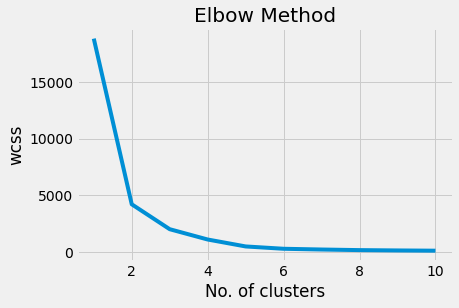

In [948]:
# Viewing ELBOW method to get the optimal value of K

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

From the graph above, we can see that according to the "Elbow validation approach", if we choose 6 clusters, then we will achieving a minium error of wcss

In [968]:
#Model Build
kmeans_model = KMeans(n_clusters= 6, max_iter = 300, 
                    init='k-means++', random_state=123, 
                    verbose = 1, algorithm='auto')
output_2 ['y_pred'] = kmeans_model.fit_predict(X)

Initialization complete
Iteration 0, inertia 476.24430941097756
Iteration 1, inertia 305.45124420822316
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 545.1293060336468
Iteration 1, inertia 312.23617160969565
Iteration 2, inertia 306.7580124449414
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 450.11941478483624
Iteration 1, inertia 371.25146932287197
Iteration 2, inertia 315.63184862610007
Iteration 3, inertia 306.7580124449414
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 437.38137171068325
Iteration 1, inertia 354.673138677147
Iteration 2, inertia 306.7580124449414
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 483.96926552932047
Iteration 1, inertia 360.83374491274463
Iteration 2, inertia 310.9491377773325
Iteration 3, inertia 305.45124420822316
Converged at iteration 3: strict convergence.
Initialization co

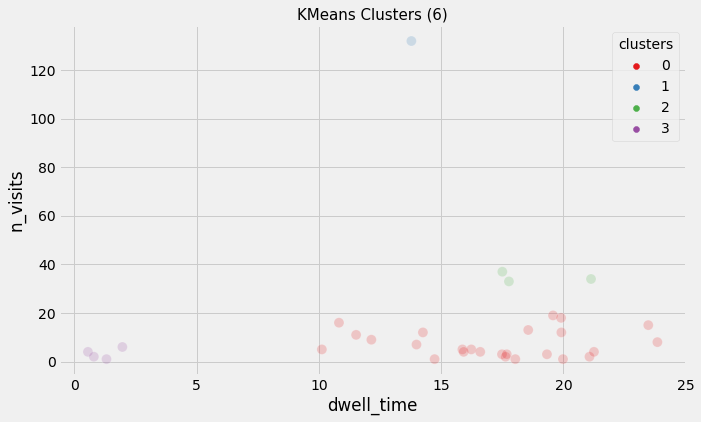

In [980]:
# plot results
plt.figure(figsize=(10,6))

plot_clusters = sns.scatterplot(x='dwell_time', y='n_visits', hue='y_pred',palette='Set1', s=100, alpha=0.2,  
                data=output_2).set_title('KMeans Clusters (6)', fontsize=15)

plt.legend(loc='upper right', title='clusters')